# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: indicators which tell us which free-tier customers will convert to paying customers

#### 2. What are the predictors/covariates? 

Answer: age, gender, location, profession, days since last log in and activity score

#### 3. What timeframe is this data relevent for?

Answer: Jan-Apr 2015

#### 4. What is the hypothesis?

Answer: **H0**:Various factors listed have an influence on conversion to pay customer
**H1**: Various factors listed don't have an influence on conversion to pay customer

## Let's get started with our dataset

In [ ]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
path_to_file = '../assets/admissions.csv'

df = pd.read_csv(path_to_file)

df.head()
df.describe()

#### 1. Create a data dictionary 

In [22]:
dict = pd.DataFrame({"Variable": ['Admit','GRE','GPA','Prestige'], 
       "Description": ['0 = Not Admit, 1 = Admit','GRE Test Score from 0-800','Grade Point Average from 0-4','Rank of the applicants undergrad almamater. 1 is the highest and 4 is the lowest'],
       "Type of Variable": ['categorial','continuous','continuous','categorial']}).set_index("Variable")
dict

,Description,Type of Variable
Variable,,
Admit,"0 = Not Admit, 1 = Admit",categorial
GRE,GRE Test Score from 0-800,continuous
GPA,Grade Point Average from 0-4,continuous
Prestige,Rank of the applicants undergrad almamater. 1 ...,categorial


Answer: 

Variable | Description | Type of Variable
---| ---| ---
Var 1 | 0 = not thing 1 = thing | categorical
Var 2 | thing in unit X | continuous 


We would like to explore the association between X and Y 

#### 2. What is the outcome?

Answer: Indicators which tell us which students have been admitted or not

#### 3. What are the predictors/covariates? 

Answer: GRE, GPA and Prestige

#### 4. What timeframe is this data relevent for?

Answer: N/A

#### 4. What is the hypothesis?

Answer: **H0**:Various factors in the data set have an influence on admission rate **H1**: Various factors in the data don't have an influence on admission rate

Using the above information, write a well-formed problem statement. 


## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: The goal is to find the factors which affect admissions into grad school

#### 2a. What are the assumptions of the distribution of data? 

Answer: 
1. The data is normally distributed
2. The data shows all the variables which affect admit rate

#### 2b. How will determine the distribution of your data? 

Answer: We can look at some histograms to determine the distribution of the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b0b8210>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1b382750>]], dtype=object)

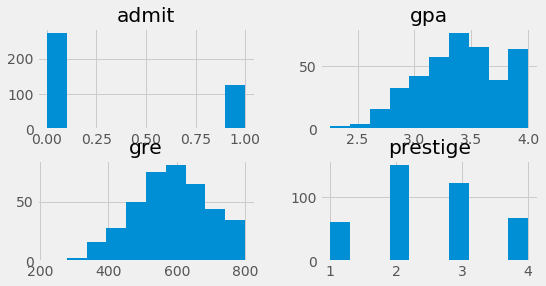

In [30]:
df.hist(figsize = (8, 4))

#### 3a. How might outliers impact your analysis? 

Answer: Outliers can have an sizable affect on the mean, standard deviation and correlation.

#### 3b. How will you test for outliers? 

Answer: We can test for outliers by building a box plot and seeing which data points fall outside of Q1 - 1.5(IQR) and Q3+ 1.5(IQR) range.

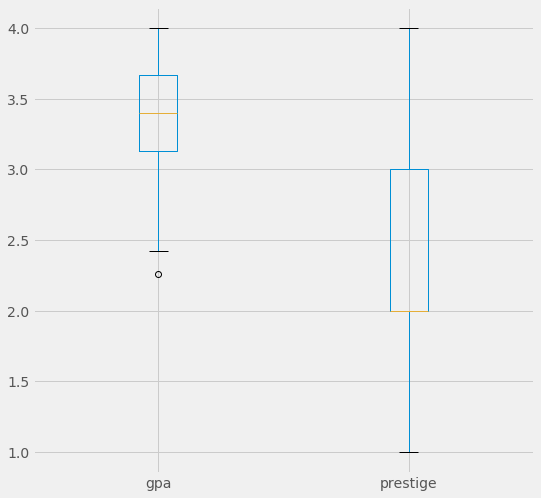

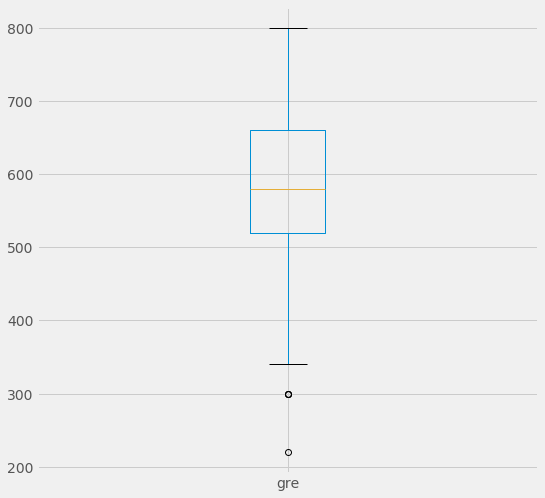

In [29]:
df[ ['gpa','prestige'] ].plot(kind = 'box', figsize = (8, 8))
df[ ['gre'] ].plot(kind = 'box', figsize = (8, 8))

#### 4a. What is colinearity? 

Answer: Linear relationship between two variables

#### 4b. How will you test for colinearity? 

Answer: We can run a correlation table to see if any variables have 

In [31]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: 
1. Load the admissions data set
2. Check the distribution of the data by looking at histograms
3. Determine the outliers in your data by looking at boxplots
4. Test for Colinearity between the different variables

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model

**Analysis Method**
1. Analyze the summary statistics of the data.
2. Use crosstab aggregation to look at different cuts of the data and how they correlate with admit rate
3. Split the prestige columns into dummy variables and Run a logistic regression

**Alternative problem statement**: Does a higher ranked undergraduate college lead to higher GRE scores

There are other variables which can affect GRE score besides college ranking (taking GRE courses, studying longer for the exam etc.)